    threshold    TP    FP    TN    FN       TPR       FPR
0    0.000000     0     0  5981  2886  0.000000  0.000000
1    0.020408     0    50  5931  2886  0.000000  0.008360
2    0.040816     0    50  5931  2886  0.000000  0.008360
3    0.061225     0    50  5931  2886  0.000000  0.008360
4    0.081633     0    50  5931  2886  0.000000  0.008360
5    0.102041   140    50  5931  2746  0.048510  0.008360
6    0.122449   359    50  5931  2527  0.124394  0.008360
7    0.142857   658    50  5931  2228  0.227997  0.008360
8    0.163265   822    50  5931  2064  0.284823  0.008360
9    0.183673  1029    50  5931  1857  0.356549  0.008360
10   0.204082  1169    50  5931  1717  0.405059  0.008360
11   0.224490  1327    50  5931  1559  0.459806  0.008360
12   0.244898  1459    50  5931  1427  0.505544  0.008360
13   0.265306  1561    50  5931  1325  0.540887  0.008360
14   0.285714  1668    52  5929  1218  0.577963  0.008694
15   0.306122  1736    84  5897  1150  0.601525  0.014044
16   0.326531 

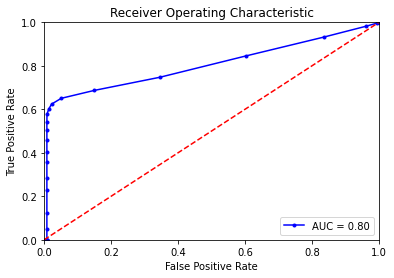

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
import sys
import sklearn.metrics as metrics


df=pd.read_csv("./PRcurve.txt", sep=r',',header=0, skipinitialspace=True)


df['TPR'] = df.apply (lambda row: row["TP"]/(row["TP"]+row["FN"]), axis=1)
df['FPR'] = df.apply (lambda row: row["FP"]/(row["FP"]+row["TN"]), axis=1)
tpr = df["TPR"].to_numpy()
fpr = df["FPR"].to_numpy()


print(df)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, marker='.')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')
